# Multiple Linear Regression for the dataset

In [17]:
# Import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Read the data from input csv file
delivery = pd.read_csv(r"C:\Users\udayk\Downloads\delivery.csv")

In [11]:
delivery.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


# Visualizing the delivery dataset

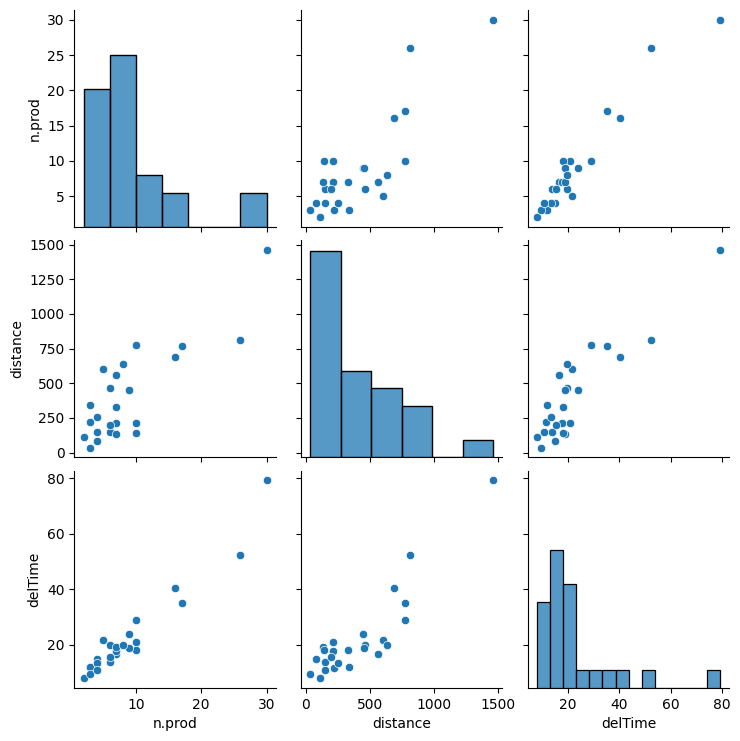

In [12]:
# visualizing data
sns.pairplot(delivery)

In [13]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 732.0 bytes


# Building a Multiple Linear Regression Model

In [15]:
# importing the required module to build the model
from sklearn.linear_model import LinearRegression

# Instantiating the algorithm for building the model
model = LinearRegression()

# selecting the predictors and targets
x = delivery[["n.prod","distance"]]
y = delivery['delTime']

# building the model using fit() method
model.fit(x,y)

print("Intercept:", model.intercept_ ,"\nCoefficients:",model.coef_)

Intercept: 2.3412311451922 
Coefficients: [1.61590721 0.01438483]


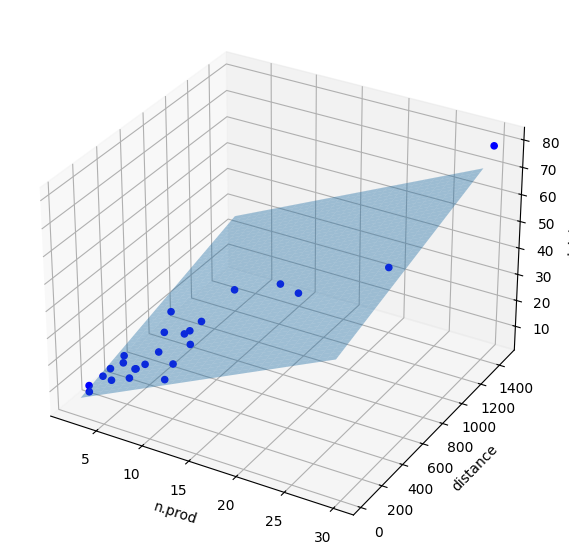

In [18]:
#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')#projection = '3d' is used to have 3D axes
#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")
#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})
#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)
#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4) # apha => transparency of the surface


# Linear independence of predictors for delivery time dataset

In [19]:
np.corrcoef(delivery["n.prod"],delivery["distance"])

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

In [23]:
# compute the VIF for the independent variables n.prod and distance.
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculating the VIF for each attributes
vif = pd.Series([variance_inflation_factor(x.values,idx) 
           for idx in range(x.shape[1])],
          index=x.columns)
print(vif)

n.prod      7.848245
distance    7.848245
dtype: float64


It is observed that the VIF values are greater than 5 for both n.prod and distance features. Also both the features are exhibiting a high correlation value between them. 

In [24]:
model.score(x,y)

0.9595937494832257

It is observed that the R2 value for the obtained best fit linear regression model is approximately 0.9595937. The R2 value in this case indicates that approximately 95.95 % of the variability observed in the delTime of the vending machine can be explained by variability in the predictor variables, n.prod and distance.

You must be able to recall that the values of R2 ranges between 0 and 1 in Simple Linear Regression. The higher the value of R2 (close to 1), the model is considered as useful.

In [30]:
# Model with a single predictor - n.prod
model1 = LinearRegression()
features = ["n.prod"]
target = ["delTime"]
model1.fit(delivery[features],delivery[target])
print(model1.score(delivery[features],delivery[target]))

# Model with multiple predictors - n.prod,distance
model2 = LinearRegression()
features = ["n.prod","distance"]
target = ["delTime"]
model2.fit(delivery[features],delivery[target])
print(model2.score(delivery[features],delivery[target]))

0.9304813135986855
0.9595937494832257


In [31]:
#computation of adjusted R-squared
X = delivery[features]
y = delivery[target]
adjusted_rscore = 1 - (1-model2.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_rscore)


0.9559204539817008


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2, random_state=100)
X_train.shape , X_test.shape



((20, 2), (5, 2))

In [34]:
from sklearn.metrics import mean_squared_error
#root mean square error (RMSE) calculation for train data
train_predictions = model.predict(X_train)
train_RMSE=mean_squared_error(Y_train,train_predictions)**0.5
#root mean square error (RMSE) calculation for test data
test_predictions = model.predict(X_test)
test_RMSE=mean_squared_error(Y_test,test_predictions)**0.5
print('Train RMSE : ',train_RMSE)
print('Test RMSE : ',test_RMSE)



Train RMSE :  3.1885062243130378
Test RMSE :  2.5662935234637114
